Gowtham S - 24BAD028 Scenario 1
MSE : 6.221446882618041
RMSE: 2.494282839338402
R²  : 0.6492792001567076


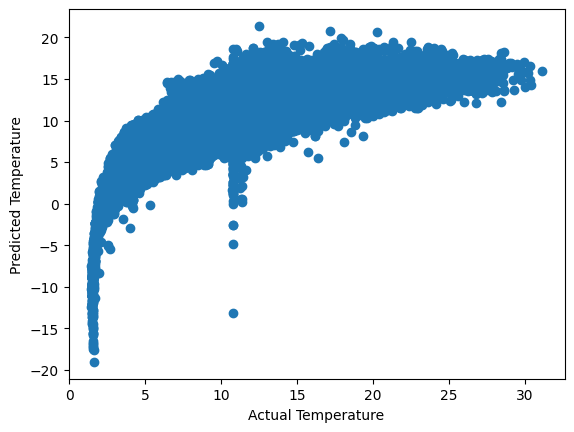

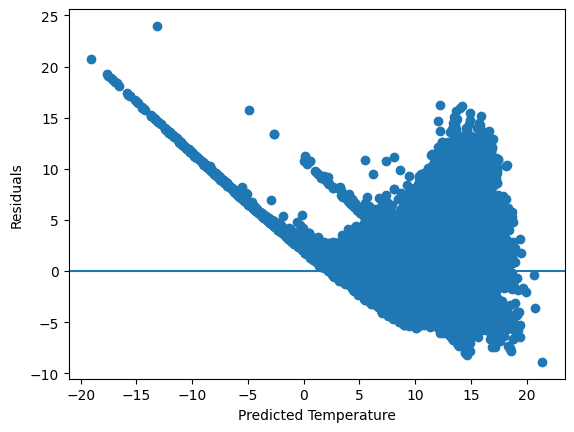

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Gowtham S - 24BAD028 Scenario 1")
# Load dataset
data = pd.read_csv("bottle.csv", low_memory=False)

# Select safe, existing columns only
features = ['Depthm', 'Salnty', 'O2ml_L']
target = 'T_degC'
data = data[features + [target]]

# Handle missing values
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

# Split data
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²  :", r2_score(y_test, y_pred))

# Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.show()

# Residuals
plt.scatter(y_pred, y_test - y_pred)
plt.axhline(0)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.show()


Gowtham S - 24BAD028 Scenaio 2
Accuracy: 0.5888738127544098
Precision: 1.0
Recall: 0.013029315960912053
F1-Score: 0.02572347266881029
Confusion Matrix:
 [[430   0]
 [303   4]]


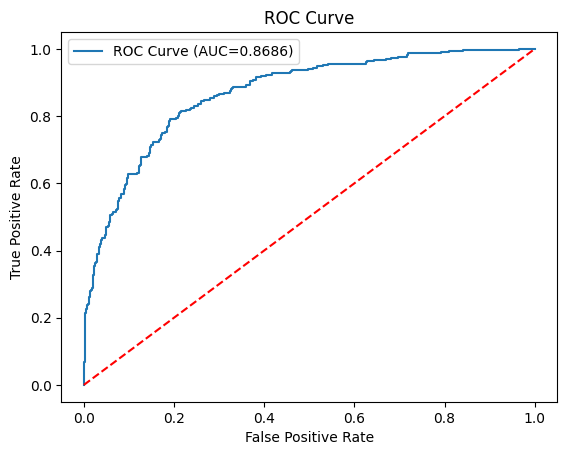

Best Hyperparameters: {'C': 100}
Tuned Model Accuracy: 0.7964721845318861


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

print("Gowtham S - 24BAD028 Scenaio 2")
#  Load dataset
data = pd.read_csv("LICI.csv")

# Create target variable: 1 if close > open else 0
data['price_movement'] = np.where(data['close'] > data['open'], 1, 0)

# Select features and target
X = data[['open', 'high', 'low', 'volume']]
y = data['price_movement']

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression
model = LogisticRegression(solver='liblinear', max_iter=500)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc:.4f})')
plt.plot([0,1],[0,1],'--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Hyperparameter tuning (C only, warning-free)
param_grid = {'C':[0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=500), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Hyperparameters:", grid.best_params_)

# 11. Evaluate tuned model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
